In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Valores pseudoaleatorios generados
numeros_generados = []

# Generador congruencial mixto
def gcm(x): # x es la semilla
    a = 16807  # Multiplicador
    c = 18446744073709551603  # Incremento
    m = 2**31-1  # Modulo
    while True:
        x = (a * x + c) % m
        numeros_generados.append(x)
        yield x

def piedraPapelOTijera(n):
    resultados = []  # Lista vacia
    jugador1 = []  # Lista vacia para guardar los resultados del jugador 1
    jugador2 = []  # Lista vacia para guardar los resultados del jugador 2
    random = gcm(120871089547)  # Generador de numeros aleatorios

    # Genera n resultados aleatorios
    for i in range(n):
        # piedra = 0, papel = 1, tijera = 2
        jugador1.append(next(random) % 3) 
        jugador2.append(next(random) % 3)
        # Guarda el resultado de la partida
        if(jugador1[i] == jugador2[i]):
            resultados.append(0)
        elif(jugador1[i] == 0 and jugador2[i] == 1):
            resultados.append(2)
        elif(jugador1[i] == 0 and jugador2[i] == 2):
            resultados.append(1)
        elif(jugador1[i] == 1 and jugador2[i] == 0):
            resultados.append(1)
        elif(jugador1[i] == 1 and jugador2[i] == 2):
            resultados.append(2)
        elif(jugador1[i] == 2 and jugador2[i] == 0):
            resultados.append(2)
        elif(jugador1[i] == 2 and jugador2[i] == 1):
            resultados.append(1)

    # Retorna la lista de resultados
    dataNum = pd.DataFrame(jugador1).rename(columns={0: 'Jugador 1'}).join(pd.DataFrame(jugador2).rename(
            columns={0: 'Jugador 2'}).join(pd.DataFrame(resultados).rename(columns={0: 'Resultado'})))
    dataNum.index += 1
    dataNum.to_csv('resultadosNum.csv')

    data = pd.DataFrame(jugador1).rename(columns={0: 'Jugador 1'}).join(pd.DataFrame(jugador2).rename(
        columns={0: 'Jugador 2'})).join(pd.DataFrame(resultados).rename(columns={0: 'Resultado'}))
    data[['Jugador 1', 'Jugador 2']] = data[['Jugador 1', 'Jugador 2']].replace({0: 'Piedra', 1: 'Papel', 2: 'Tijera'})
    data[['Resultado']] = data[['Resultado']].replace({0: 'Empate', 1: 'Gana Jugador 1', 2: 'Gana Jugador 2'})
    data.index += 1
    data.to_csv('resultadosPPT.csv')

    # Genera una lista del conteo de cada resultado
    dataResultados = pd.DataFrame(resultados).replace({0: 'Empate', 1: 'Gana Jugador 1', 2: 'Gana Jugador 2'}).value_counts(
    ).rename_axis('Resultados').reset_index(name='counts')
    display(dataResultados)
    dataResultados.sort_values(by=['Resultados'], inplace=True)

    print("Media: ", np.mean(dataResultados['counts']))
    print("Varianza: ", np.var(dataResultados['counts']))
    print("Desviacion estandar: ", np.var(dataResultados['counts'])**0.5)

    # Grafica los resultados en un grafico de barras
    dataResultados.plot(kind='bar', x='Resultados', y='counts',
                        title='Resultados de ' + str(n) + ' juegos de piedra, papel o tijera',
                        ).set(xlabel='Resultados', ylabel='Cantidad')
    plt.show()

    # Grafica los resultados en un grafico de pastel
    dataResultados.plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=['red', 'blue', 'green'],
        labels=['Empate', 'Gana Jugador 1', 'Gana Jugador 2'],
        title='Resultados de ' + str(n) + ' juegos de piedra, papel o tijera',
        ylabel='',
        y='counts',),
    plt.show()

    # Grafica los resultados en un histograma
    dataResultados.plot(kind='hist', x='Resultados', y='counts',
                        title='Resultados de ' + str(n) + ' juegos de piedra, papel o tijera',
                        ).set(xlabel='Resultados', ylabel='Cantidad')
    plt.show()

,Resultados,counts
0,Empate,341
1,Gana Jugador 1,336
2,Gana Jugador 2,323


Media:  333.3333333333333
Varianza:  57.555555555555564
Desviacion estandar:  7.586537784494029


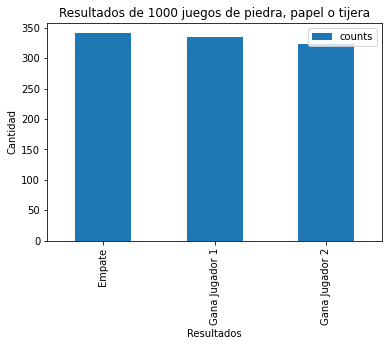

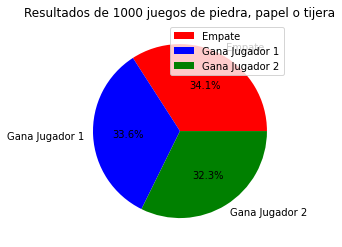

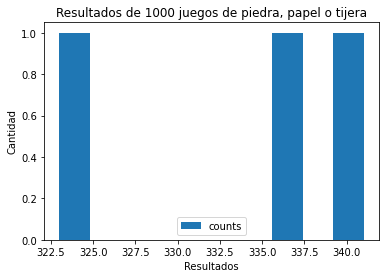

Media de los numeros generados:  1070750377.021
Varianza de los numeros generados:  3.860244090664395e+17
Desviacion estandar de los numeros generados:  621308626.2610873


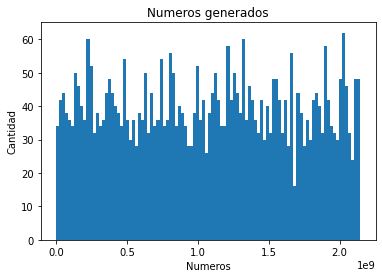

In [109]:
piedraPapelOTijera(1000)

print("Media de los numeros generados: ", np.mean(numeros_generados))
print("Varianza de los numeros generados: ", np.var(numeros_generados))
print("Desviacion estandar de los numeros generados: ", np.var(numeros_generados)**0.5)

# Grafica los numeros generados en un histograma
plt.hist(numeros_generados, bins=100)
plt.title('Numeros generados')
plt.xlabel('Numeros')
plt.ylabel('Cantidad')
plt.show()